### simulate time series given parameters

In [2]:
# spectral tensor train decomposition page 20
import numpy as np 
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 12,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': False,
   }
mpl.rcParams.update(params)

sns.set_style("whitegrid")
sns.despine()

def f1(x, w, c):
    y=np.cos(2*np.pi*w +  c*x)
    return y

def f2(x, w, c):
    y=(c**(-2) + (x+w)**2)**(-1)
    return y

def f3(x, w, c):
    y = (1 + c*x)**(-2)
    return y

def f4(x, w, c):
    y = np.exp(- c**2 *(x-w)**2)
    return y

def f5(x, w, c):
    y = np.exp(- c**2 *np.abs(x-w) )
    return y

def f6(x, w, c):
    if x > w:
        y = 0
    else:
        y = np.exp(c * x)
    return y

In [67]:
# YS Parameters
# w = 0.5
# c = 10
def gen_xs(Genz, T):
    # Generate the function
    ys = []
    xs = np.linspace(0,1.0,T)
    for x_i in xs:
        ys.append(Genz(x_i, w, c))
    print('ys generated')
    return ys


def gen_ts(Genz, h0, T):
    # Generate the dynamics
    ts = []
    h1 = h0
    for i in range(T):
        h2 = Genz(h1, w, c)
        h1 = np.copy(h2)
        ts.append(h1)
#     print('ts generated')
    return ts

def gen_dat(Genz, N, T):
    # generate n x t x 1 
    dat = np.empty((N,T,1))
    #random initial 
    init_range = np.random.uniform(-0.1,1.0,(N,))

    for i in range(N):
        h0 = init_range[i]
        dat[i,:,0] = np.asarray(gen_ts(Genz, h0, T))
    return dat

### Visualize the generated sequence

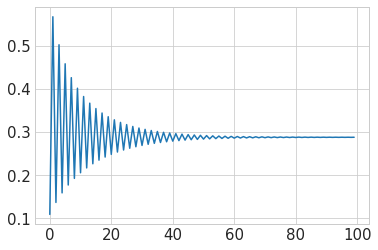

In [134]:
# generate one 
%matplotlib inline
w = 0.5
c = 3
Genz = f3
dat = gen_dat(Genz, 1, 100)
plt.plot(np.squeeze(dat))

In [ ]:
for n in range(1,7):
    print('f'+str(n))
    Genz = globals()["f"+str(n)]
    xs = gen_xs(Genz, T)
    ts = gen_ts(Genz, T)  
 
    plt.plot(xs[:100])
    plt.savefig('../result/f'+str(n)+'.png')
    plt.gcf().clear()
    np.save('../result/f'+str(n)+'.npy', xs)

    plt.plot(ts[:100])
    plt.savefig('../result/df'+str(n)+'.png')
    plt.gcf().clear()
    np.save('../result/df'+str(n)+'.npy', xs)

### generate Genz time series set

In [135]:
N = int(1e4)
T = 100
for n in range(3,4):
    print('f'+str(n))
    Genz = globals()["f"+str(n)]
    dat = gen_dat(Genz, N, T)
    np.save('/home/qiyu/data/'+'f'+str(n)+'.npy', dat)

f3
